<a href="https://colab.research.google.com/github/Nelkit/36103-AT2-data-analysis-project/blob/nelkit/36103_AT2B_data_analysis_project(credit_data_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessment task 2: Data analysis project




## 📝 TODO List

✅ Project Overview  
- [ ] **1.1 Project Description**  
- [ ] **1.2 Business Objective**  
- [ ] **1.3 Research Questions**  

📥 Data Loading and Understanding  
- [x] ~~Load the dataset~~  
- [x] ~~Check for missing values and duplicates~~  
- [x] ~~Understand data types and structure~~  

📊 Exploratory Data Analysis (EDA)  
- [x] ~~3.1 Explore features~~  
- [x] ~~3.2 Explore target variable~~
- [x] ~~Visualize distributions, correlations, and patterns~~  

🎯 Feature Selection  
- [ ] **4.1 Feature Selection Approach** (correlation, importance scores, etc.)  
- [ ] **4.2 Final Selected Features**  

🛠 Data Preprocessing  
- [ ] **5.1 Data Cleaning** (handle missing values, outliers, duplicates)  
- [ ] **5.2 Feature Engineering** (create new features, transformations)  
- [ ] **5.3 Data Transformation** (scaling, encoding, normalization)  

🤖 Data Modeling  
- [ ] **6.1 Generate Predictions with Baseline Model**  
- [ ] **6.2 Assess the Baseline Model**  

📈 Model Evaluation  
- [ ] **7.1 Generate Predictions with Model Selected**  
- [ ] **7.2 Assess the Selected Model** (metrics, performance comparison)  

🔍 Insights and Conclusions  
- [ ] Summarize key findings  
- [ ] Discuss model performance and business impact  
- [ ] Identify limitations and potential improvements


## 0. Setup Environment

### 0.a Install Mandatory Packages

> Do not modify this code before running it

In [39]:
# Do not modify this code

import os
import sys
from pathlib import Path

COURSE = "36103"
ASSIGNMENT = "AT2"
DATA = "data"

asgmt_path = f"{COURSE}/assignment/{ASSIGNMENT}"
root_path = "./"

if os.getenv("COLAB_RELEASE_TAG"):

    from google.colab import drive
    from pathlib import Path

    print("\n###### Connect to personal Google Drive ######")
    gdrive_path = "/content/gdrive"
    drive.mount(gdrive_path)
    root_path = f"{gdrive_path}/MyDrive/"

print("\n###### Setting up folders ######")
folder_path = Path(f"{root_path}/{asgmt_path}/") / DATA
folder_path.mkdir(parents=True, exist_ok=True)
print(f"\nYou can now save your data files in: {folder_path}")

if os.getenv("COLAB_RELEASE_TAG"):
    %cd {folder_path}



###### Connect to personal Google Drive ######
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

###### Setting up folders ######

You can now save your data files in: /content/gdrive/MyDrive/36103/assignment/AT2/data
/content/gdrive/MyDrive/36103/assignment/AT2/data


### 0.b Disable Warnings Messages

> Do not modify this code before running it

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [41]:
!pip install scipy

### 0.d Import Packages

In [42]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.gridspec as gridspec

### 0.f Reusable Functions

In [43]:
def plotting_num_feature_distributions(data, col, color = '#F9B123', dataset_name="", width=10, height=4):
  col_name = col.capitalize()
  # 1. Summary Statistics
  summary_stats = data[col].describe()
  print(f"Summary Statistics of {col_name} in {dataset_name}:")
  print(summary_stats)

  fig = plt.figure(figsize=(width, height))
  gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 4])

  # 2. Boxplot and Histogram plot
  ax_box = plt.subplot(gs[0, 0])
  sns.boxplot(x=data[col], ax=ax_box, color=color)
  ax_box.set(title=f'Boxplot and Histogram of {col_name} in {dataset_name}')
  ax_box.set(xlabel='')
  ax_box.set_xticklabels([])

  ax_hist = plt.subplot(gs[1, 0])
  sns.histplot(data, x=col, ax=ax_hist, color=color, bins=30, kde=False)
  ax_box.set_xlim(ax_hist.get_xlim())

  # 3. QQ plot
  ax_qq = plt.subplot(gs[:, 1])
  stats.probplot(data[col], dist="norm", plot=ax_qq)
  ax_qq.set_title(f'QQ Plot of {col_name} in {dataset_name}')

  plt.tight_layout()
  plt.show()

def plotting_cat_feature_distributions(data, col, dataset_name = ""):
  col_name = col.capitalize()
  print(f"Summary Statistics of {col_name} in {dataset_name}:")
  summary_stats = data[col].describe()
  print(summary_stats)

  target_count = data[col].value_counts()
  sizes = target_count.values
  total_records = len(data[col])
  category_order = target_count.index

  plt.figure(figsize=(8, 5))
  sns.countplot(data=data, x=col, hue=col, palette="Set1", order=category_order)
  plt.title(f"Distribution of {col_name} in {dataset_name}")
  for s, value in enumerate(sizes):
      percentage = (value / total_records) * 100
      percentage = round(percentage, 2)
      plt.text(s, value, f'{value} \n ({percentage}%)', color="#333", ha='center', va='bottom', fontsize=10, weight="bold")

  plt.xlabel(col_name)
  plt.ylabel("Count")
  plt.xticks(rotation=45, ha='right')
  plt.show()

def get_corr_of_predictors(method, data, predictors_names, width=6, height=5):
  continuous_data = data[predictors_names]

  correlation_matrix = continuous_data.corr(method=method)
  plt.figure(figsize=(width, height))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title(f'Correlation Matrix of Predictors using {method.capitalize()} method')
  plt.show()

  return correlation_matrix

def check_duplicates(data):
    duplicates = data.duplicated()
    duplicates_count = duplicates.sum()
    total_records = len(data)
    percentage_duplicates = (duplicates_count / total_records) * 100
    percentage_duplicates = round(percentage_duplicates, 2)

    print(f'There are {duplicates_count} of {total_records} ({percentage_duplicates})% duplicates rows')
    return duplicates

def check_missing_values(data):
    missing_counts = data.isnull().sum()
    total_records = len(data)
    missing_summary = missing_counts[missing_counts > 0].sort_values(ascending=False)

    if missing_summary.empty:
        print("There are no missing values in the dataset.")
    else:
        print("Missing values per column:")
        for column, count in missing_summary.items():
            percentage = (count / total_records) * 100
            print(f"- {column}: {count} missing ({round(percentage, 2)}%)")

    return data.isnull()

def check_shape(data):
    rows, columns = data.shape
    print(f'The dataset has {rows} rows and {columns} columns.')
    return data.shape

def get_corr_of_predictors_and_target(method, data, target_name, predictors_names):
  continuous_data = data[predictors_names + [target_name]]

  correlation_matrix = continuous_data.corr(method=method)
  ly_corr = correlation_matrix[target_name].sort_values(ascending=False)

  sns.barplot(x=ly_corr.index, y=ly_corr.values, palette='coolwarm', hue=ly_corr.values)
  plt.title(f'Correlation of {target_name} with other attributes using {method.capitalize()} method')
  plt.xlabel('Attributes')
  plt.ylabel('Correlation Coefficient')

  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()

  plt.show()
  return correlation_matrix

def perform_anova(data, target_name, category_name):
    categories = data[category_name].unique()

    groups = [data[data[category_name] == category][target_name] for category in categories]

    anova_result = stats.f_oneway(*groups)

    hypothesis_result = ""
    if anova_result.pvalue < 0.05:
        hypothesis_result = "Reject the null hypothesis. There is a significant difference in the means of the groups."
    else:
        hypothesis_result = "Fail to reject the null hypothesis. There is no significant difference in the means of the groups."

    return {"title": f"ANOVA for {category_name} vs {target_name}" , "F-value": anova_result.statistic, "pvalue": anova_result.pvalue, "result": hypothesis_result}


## 1. Project Overview

### 1.1 Project Description

`Type your project decription here`

### 1.2 Business Objective

`Type your business objective here`

### 1.3 Research Questions

`Type your research Questions here`

## 2. Data Loading and Understanding

In [44]:
original_df = pd.read_csv(folder_path / "Credit_Data.csv")

## 3. Exploratory Data Analysis (EDA)

### 3.1 Explore features

In [45]:
original_df.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [46]:
check_shape(original_df)

The dataset has 400 rows and 12 columns.


(400, 12)

In [47]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    object 
 8   Student    400 non-null    object 
 9   Married    400 non-null    object 
 10  Ethnicity  400 non-null    object 
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [48]:
original_df.describe()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [49]:
num_cols = list(original_df.select_dtypes(include=['int64', 'float64']).columns)
cat_cols = list(original_df.select_dtypes(include=['object']).columns)
target_col = "Balance"

# Remove id and target columns from num_cols
num_cols = [col for col in num_cols if col not in ['ID', target_col]]

print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")
print(f"Target column: {target_col}")

Numerical columns: ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']
Categorical columns: ['Gender', 'Student', 'Married', 'Ethnicity']
Target column: Balance


Summary Statistics of Income in Original set:
count    400.000000
mean      45.218885
std       35.244273
min       10.354000
25%       21.007250
50%       33.115500
75%       57.470750
max      186.634000
Name: Income, dtype: float64


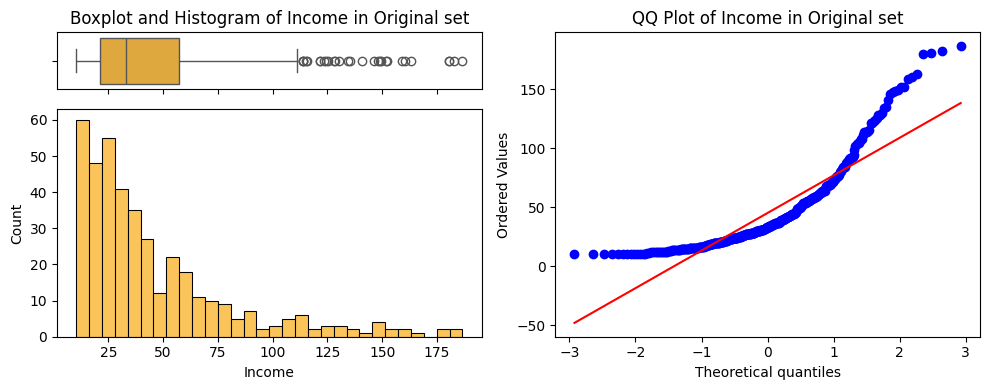

Summary Statistics of Limit in Original set:
count      400.000000
mean      4735.600000
std       2308.198848
min        855.000000
25%       3088.000000
50%       4622.500000
75%       5872.750000
max      13913.000000
Name: Limit, dtype: float64


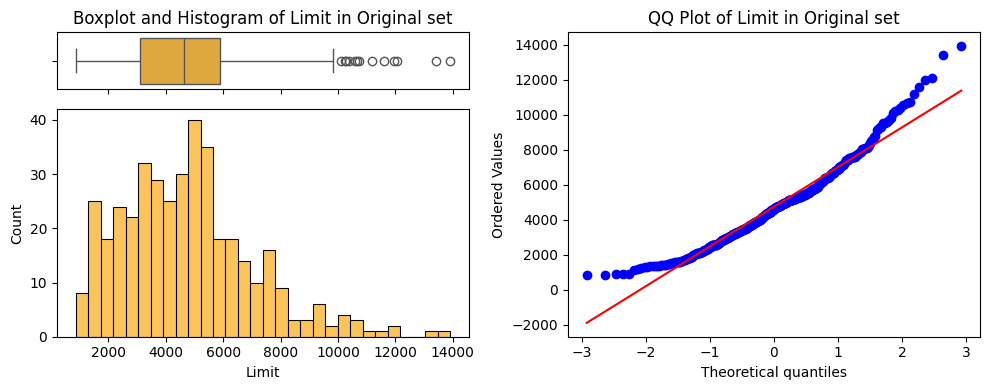

Summary Statistics of Rating in Original set:
count    400.000000
mean     354.940000
std      154.724143
min       93.000000
25%      247.250000
50%      344.000000
75%      437.250000
max      982.000000
Name: Rating, dtype: float64


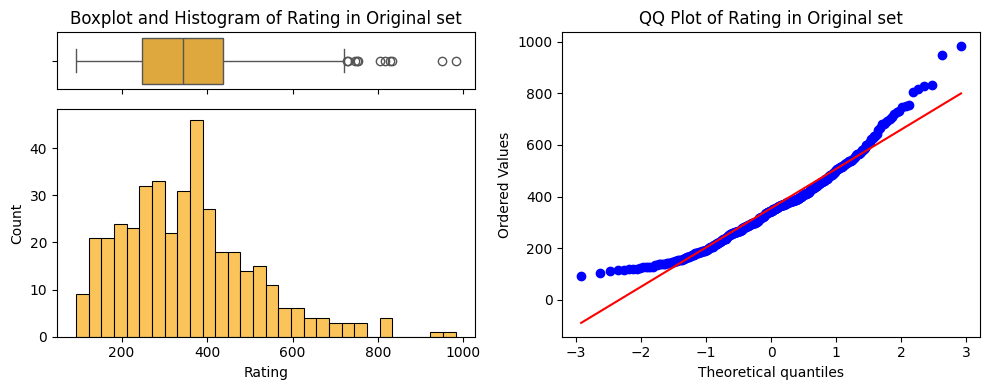

Summary Statistics of Cards in Original set:
count    400.000000
mean       2.957500
std        1.371275
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: Cards, dtype: float64


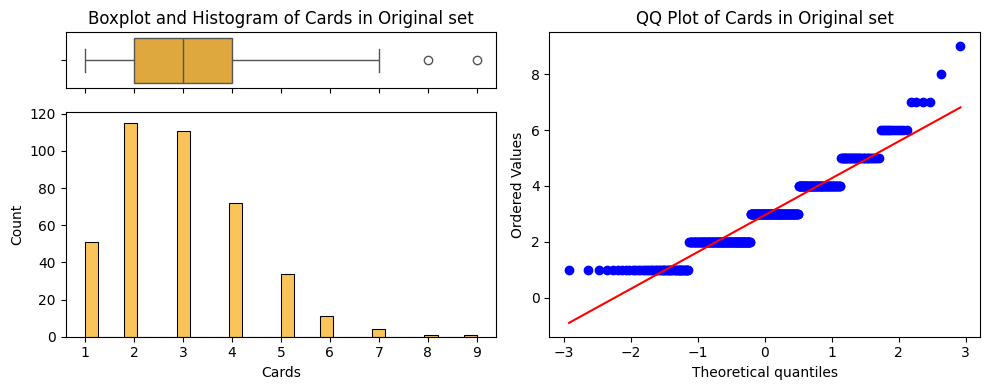

Summary Statistics of Age in Original set:
count    400.000000
mean      55.667500
std       17.249807
min       23.000000
25%       41.750000
50%       56.000000
75%       70.000000
max       98.000000
Name: Age, dtype: float64


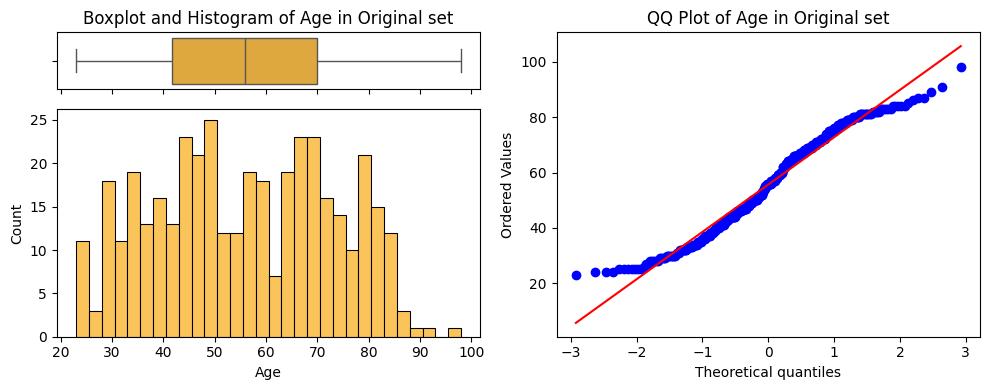

Summary Statistics of Education in Original set:
count    400.000000
mean      13.450000
std        3.125207
min        5.000000
25%       11.000000
50%       14.000000
75%       16.000000
max       20.000000
Name: Education, dtype: float64


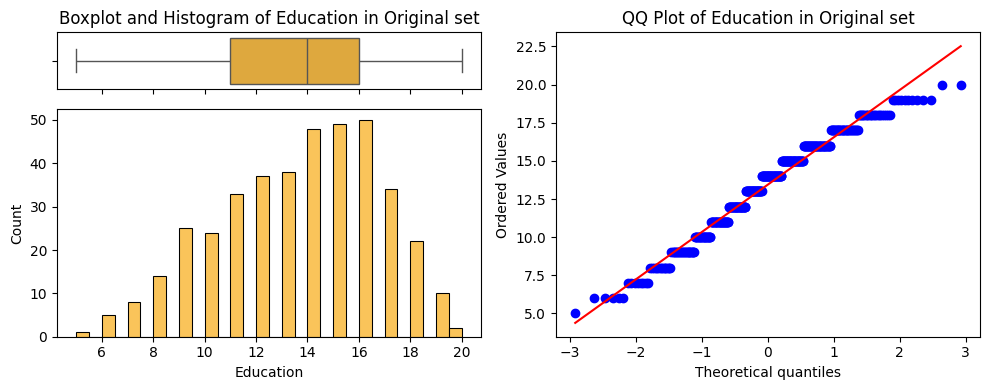

In [50]:
for col in num_cols:
  plotting_num_feature_distributions(original_df, col, dataset_name="Original set")

Summary Statistics of Gender in Original set:
count        400
unique         2
top       Female
freq         207
Name: Gender, dtype: object


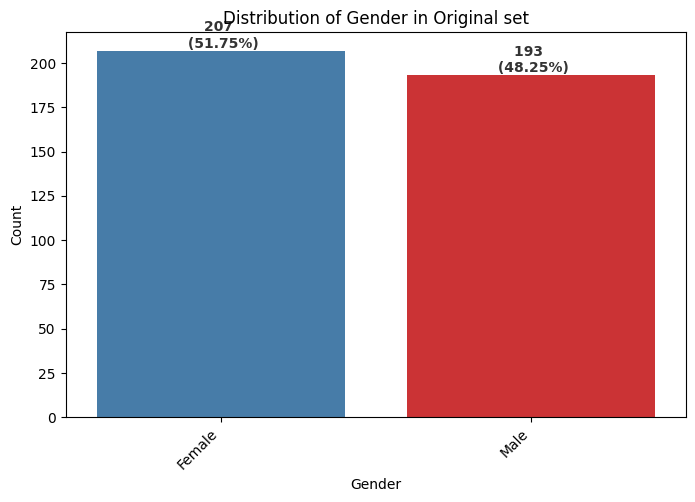

Summary Statistics of Student in Original set:
count     400
unique      2
top        No
freq      360
Name: Student, dtype: object


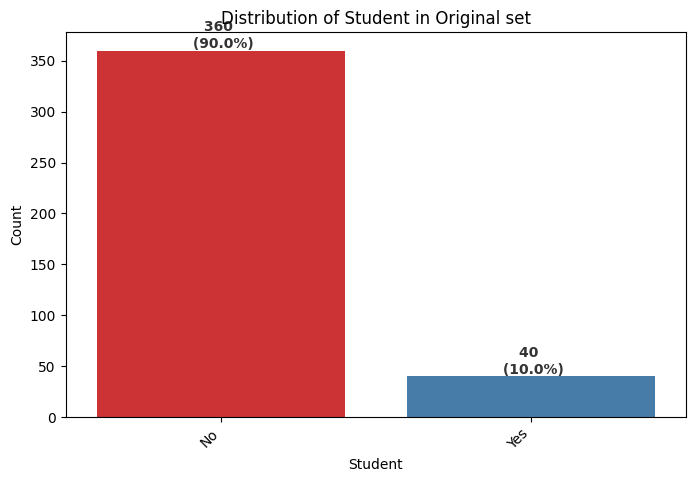

Summary Statistics of Married in Original set:
count     400
unique      2
top       Yes
freq      245
Name: Married, dtype: object


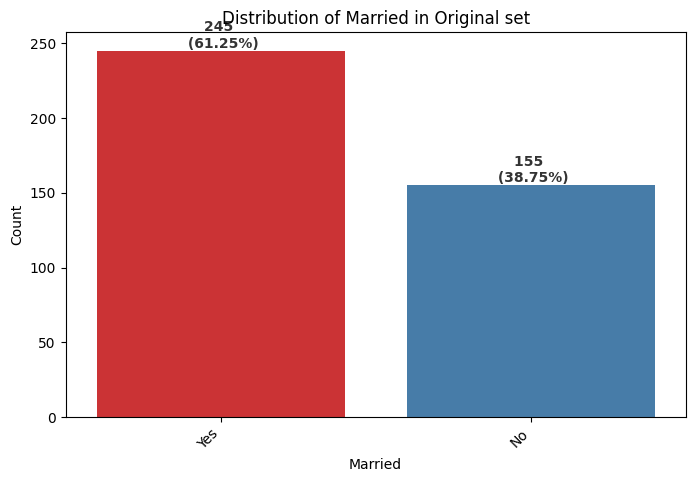

Summary Statistics of Ethnicity in Original set:
count           400
unique            3
top       Caucasian
freq            199
Name: Ethnicity, dtype: object


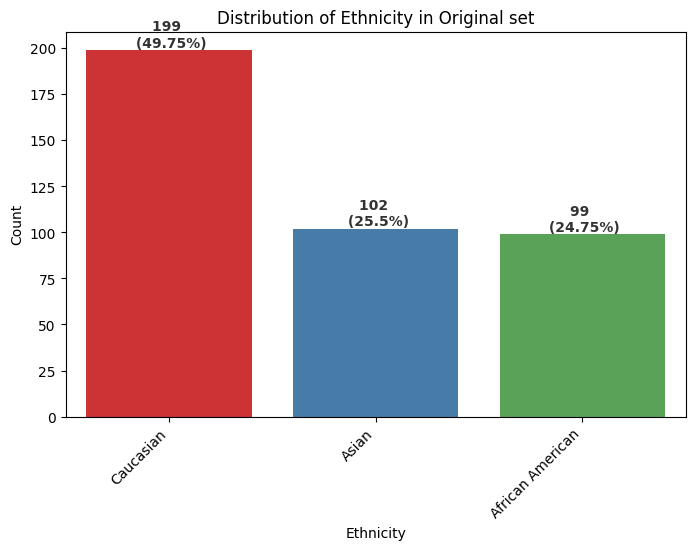

In [51]:
for col in cat_cols:
  plotting_cat_feature_distributions(original_df, col, dataset_name="Original set")

### 3.2 Explore target variable

Summary Statistics of Balance in Original set:
count     400.000000
mean      520.015000
std       459.758877
min         0.000000
25%        68.750000
50%       459.500000
75%       863.000000
max      1999.000000
Name: Balance, dtype: float64


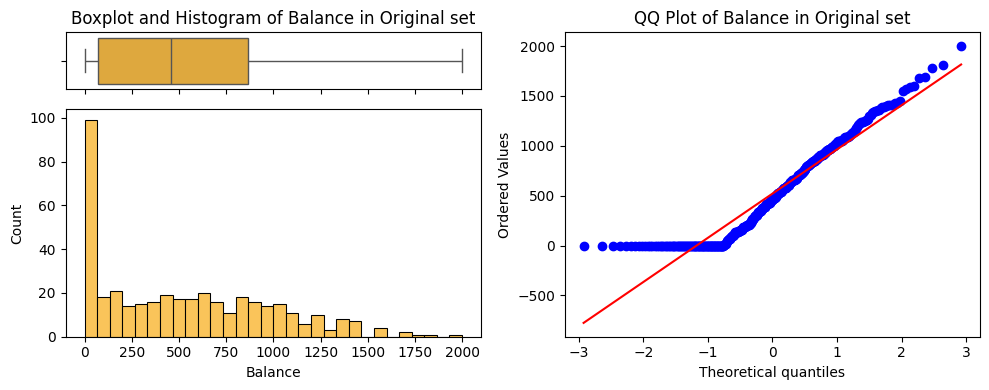

In [52]:
plotting_num_feature_distributions(original_df, target_col, dataset_name="Original set")

### 3.3 Explore duplicates and missing values

#### 3.3.1 Duplicates

In [53]:
check_duplicates(original_df)

There are 0 of 400 (0.0)% duplicates rows


,0
0,False
1,False
2,False
3,False
4,False
...,...
395,False
396,False
397,False
398,False


#### 3.3.2 Missing Values

In [54]:
check_missing_values(original_df)

There are no missing values in the dataset.


,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False,False


## 4. Feature Selection

### 4.1 Feature Selection Approach

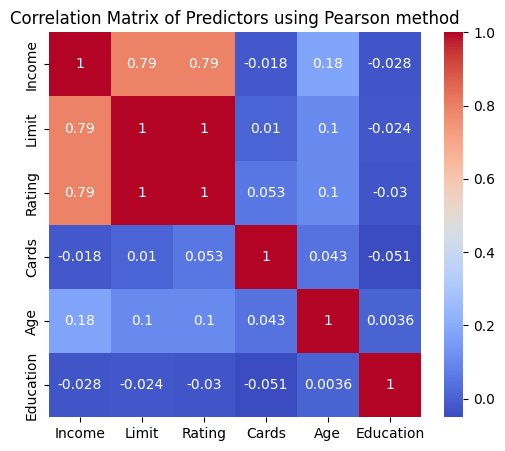

,Income,Limit,Rating,Cards,Age,Education
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000


In [55]:
get_corr_of_predictors('pearson', original_df, num_cols)

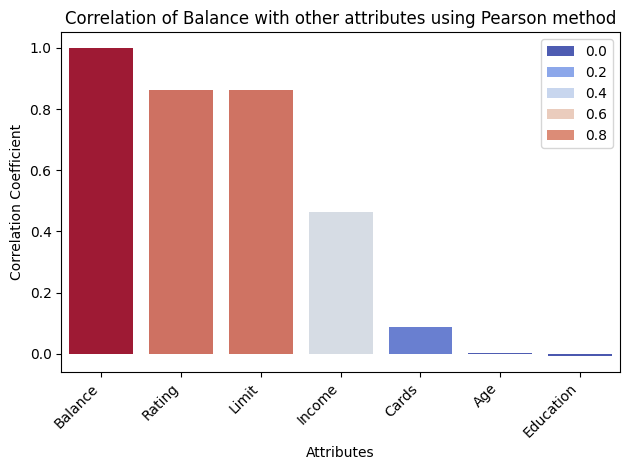

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


In [56]:
get_corr_of_predictors_and_target('pearson', original_df, target_col, num_cols)

In [57]:
anova_results = []

for cat in cat_cols:
  result = perform_anova(original_df, target_col, cat)
  anova_results.append(result)

df_anova = pd.DataFrame(anova_results)
df_anova.head(8)

,title,F-value,pvalue,result
0,ANOVA for Gender vs Balance,0.183616,6.685161e-01,Fail to reject the null hypothesis. There is n...
1,ANOVA for Student vs Balance,28.622116,1.487734e-07,Reject the null hypothesis. There is a signifi...
2,ANOVA for Married vs Balance,0.012811,9.099389e-01,Fail to reject the null hypothesis. There is n...
3,ANOVA for Ethnicity vs Balance,0.043443,9.574919e-01,Fail to reject the null hypothesis. There is n...


### 4.2 Final Selected Features

## 5. Data Preprocessing

### 5.1 Data Cleaning

### 5.2. Feature Engineering

### 5.3 Data Transformation

## 6. Data Modeling

### 6.1 Generate Predictions with Baseline Model

### 6.2 Assess the Baseline Model

## 7. Model Evaluation

### 7.1 Generate Predictions with Model Selected

### 7.2 Assess the Selected Model

## 8. Insights and Conclusions